# 3.2

In [18]:
import numpy as np

#classical gram schmidt
def cgs(A):
    m, n = A.shape
    Q = np.empty((m, n))
    R = np.zeros((n, n))
    R[0, 0] = np.linalg.norm(A[:, 0])
    Q[:, 0] = A[:, 0] / R[0, 0]
    for k in range(1, n):
        R[:k-1, k] = np.dot(Q[:m, :k-1].T, A[:m, k])
        z = A[:m, k] - np.dot(Q[:m, :k-1], R[:k-1, k])
        R[k, k] = np.linalg.norm(z) ** 2
        Q[:m, k] = z / R[k, k]
    return Q, R

In [19]:
#modified gram schmidt
def mgs(A): 
    m, n = A.shape
    Q = np.zeros((m,n))
    R = np.zeros((n,n))
    for k in range(0,n):
        R[k, k] = np.sqrt(np.dot(A[:, k], A[:, k]))
        Q[:, k] = A[:, k]/R[k, k]
        for j in range(k+1,n):
            R[k, j] = np.dot(Q[:, k], A[:, j])
            A[:, j] = A[:, j] - R[k, j]*Q[:, k]
            
    return Q, R

In [20]:
#householder
def householder(A):
    m, n = A.shape
    Q = np.eye(m) 
    R = A.copy() 
    for j in range(n):
        x = R[j:, j]
        normx = np.linalg.norm(x)
        rho = -np.sign(x[0])
        u1 = x[0] - rho * normx
        u = x / u1
        u[0] = 1
        beta = -rho * u1 / normx

        Q[:, j:] = Q[:, j:] - beta * Q[:, j:].dot(np.outer(u, u))
        R[j:, :] = R[j:, :] - beta * np.outer(u, u).dot(R[j:, :])
        
    return Q, R

In [24]:
A = np.array([[0.7,0.70711],[0.70001,0.70711]])
cgs(A)

(array([[0.70710173, 0.70710356],
        [0.70711183, 0.70710356]]),
 array([[0.98995656, 0.        ],
        [0.        , 1.0000091 ]]))

In [25]:
mgs(A)

(array([[ 0.70710173,  0.70711183],
        [ 0.70711183, -0.70710173]]),
 array([[9.89956565e-01, 1.00000455e+00],
        [0.00000000e+00, 7.14283864e-06]]))

In [26]:
householder(A)

(array([[-0.70710173,  0.70711183],
        [-0.70711183, -0.70710173]]),
 array([[-9.89956565e-01, -1.64387919e-16],
        [ 0.00000000e+00,  7.14283864e-06]]))

In [27]:
Q, R = np.linalg.qr(A)
print(Q)
print(R)

[[-0.70710173 -0.70711183]
 [-0.70711183  0.70710173]]
[[-9.89956565e-01 -1.64387919e-16]
 [ 0.00000000e+00 -7.14283864e-06]]


# 3.3

In [9]:
import numpy as np

A = [[2, 0, 0], [1, 2, 2], [1, 0, 2]]
Q, R = np.linalg.qr(A,mode='reduced')
print(Q)
print(R)

[[-8.16496581e-01  3.65148372e-01 -4.47213595e-01]
 [-4.08248290e-01 -9.12870929e-01 -1.21369485e-17]
 [-4.08248290e-01  1.82574186e-01  8.94427191e-01]]
[[-2.44948974 -0.81649658 -1.63299316]
 [ 0.         -1.82574186 -1.46059349]
 [ 0.          0.          1.78885438]]


# 4.3

In [10]:
from matplotlib import pyplot as plt

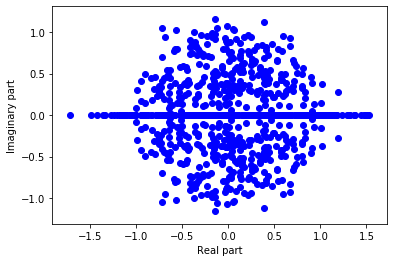

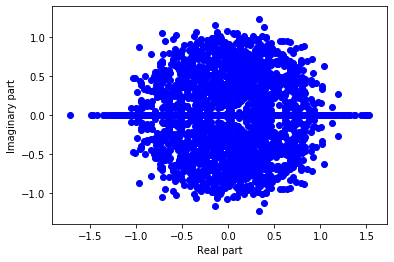

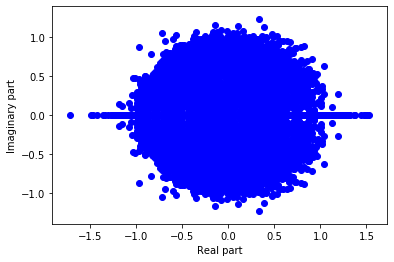

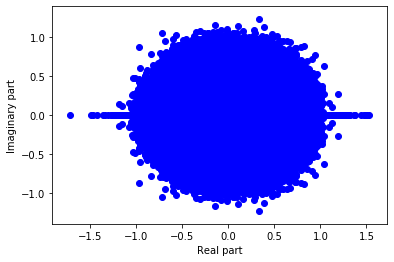

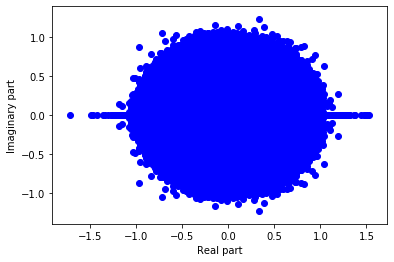

In [11]:
lam = []
rho = []
norms = []
for n in range(3,8):
    plt.figure()
    for i in range(100):
        A = np.random.randn(2**n,2**n)/np.sqrt(2**n)
        eigs_temp = np.linalg.eig(A)[0]
        rho.append(max(abs(eigs_temp)))
        lam.append(eigs_temp)
        norms.append(max(np.linalg.svd(A)[1]))
    for i in lam:
        plt.scatter(i.real,i.imag,marker='o',c='b')
        plt.xlabel('Real part')
        plt.ylabel('Imaginary part')
      

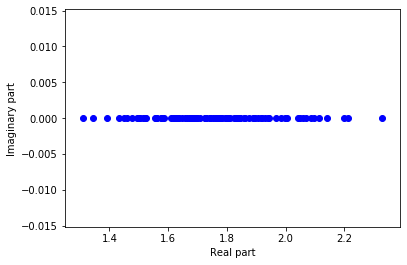

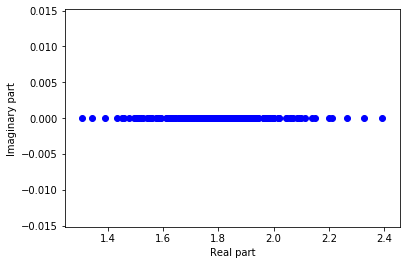

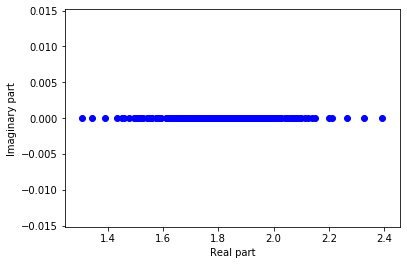

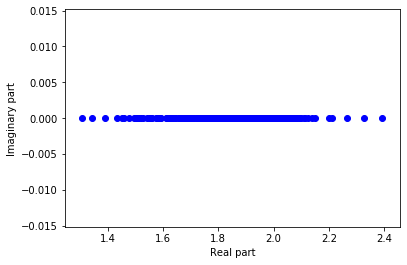

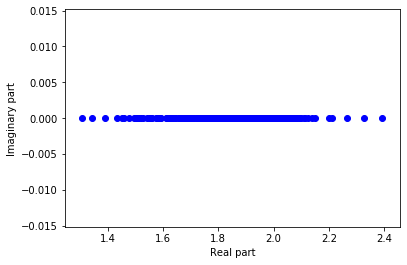

In [12]:
lam = []
rho = []
norms = []
for n in range(3,8):
    plt.figure()
    for i in range(100):
        A = np.random.randn(2**n,2**n)/np.sqrt(2**n)
        eigs_temp = np.linalg.eig(A)[0]
        rho.append(max(abs(eigs_temp)))
        lam.append(eigs_temp)
        norms.append(max(np.linalg.svd(A)[1]))
    for i in norms:
        plt.scatter(i.real,i.imag,marker='o',c='b')
        plt.xlabel('Real part')
        plt.ylabel('Imaginary part')

# 4.6

In [13]:
m = 50
n = 12

t = np.linspace(0,1,m)
b = np.cos(4*t)

In [14]:
A = np.vander(t)
               
A = np.fliplr(A)
A = A[:,1:n]
x = np.zeros((n,6))

In [15]:
mgs(A)

(array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.00497365, -0.01874904,  0.04258923, -0.07615792,  0.11772388,
         -0.16439153,  0.21241727, -0.25762143,  0.2958801 , -0.32365389,
          0.33847951],
        [ 0.00994729, -0.03645996,  0.07931252, -0.13355834,  0.19070577,
         -0.24036356,  0.27222296, -0.2780817 ,  0.25355112, -0.19909053,
          0.12009881],
        [ 0.01492094, -0.05313277,  0.11044926, -0.17427787,  0.22739638,
         -0.25282769,  0.23876511, -0.18230394,  0.09093698,  0.0187103 ,
         -0.12469487],
        [ 0.01989459, -0.06876745,  0.13627887, -0.20029734,  0.23537264,
         -0.22241807,  0.15650644, -0.05003281, -0.07007631,  0.1704222 ,
         -0.22185043],
        [ 0.02486824, -0.08336402,  0.15708077, -0.21350188,  0.22137784,
         -0.16592314,  0.05747582,  0.07039907, -0.17307394,  0.2125562

In [16]:
Q, R = np.linalg.qr(A)
print(Q)
print(R)

[[ 0.00000000e+00 -3.46944695e-17  2.77555756e-17 -2.77555756e-17
  -4.16333634e-17  4.85722573e-17 -6.93889390e-18  3.46944695e-17
  -3.46944695e-17  0.00000000e+00  1.73472348e-17]
 [-4.97364731e-03 -1.87490401e-02 -4.25892340e-02 -7.61579185e-02
  -1.17723884e-01 -1.64391534e-01  2.12417273e-01  2.57621433e-01
   2.95880097e-01 -3.23653887e-01 -3.38479511e-01]
 [-9.94729463e-03 -3.64599622e-02 -7.93125170e-02 -1.33558344e-01
  -1.90705771e-01 -2.40363565e-01  2.72222961e-01  2.78081704e-01
   2.53551116e-01 -1.99090531e-01 -1.20098815e-01]
 [-1.49209419e-02 -5.31327663e-02 -1.10449259e-01 -1.74277865e-01
  -2.27396383e-01 -2.52827692e-01  2.38765115e-01  1.82303939e-01
   9.09369764e-02  1.87102978e-02  1.24694871e-01]
 [-1.98945893e-02 -6.87674524e-02 -1.36278872e-01 -2.00297337e-01
  -2.35372638e-01 -2.22418072e-01  1.56506441e-01  5.00328126e-02
  -7.00763109e-02  1.70422195e-01  2.21850431e-01]
 [-2.48682366e-02 -8.33640205e-02 -1.57080766e-01 -2.13501881e-01
  -2.21377836e-01 -

In [17]:
np.linalg.svd(A)

(array([[ 0.00000000e+00,  3.46944695e-17, -2.77555756e-17, ...,
         -2.25244967e-01, -2.38465174e-01, -2.49930246e-01],
        [-4.97364731e-03,  1.87490401e-02,  4.25892340e-02, ...,
          1.89863691e-01,  2.68288581e-01,  2.61999094e-01],
        [-9.94729463e-03,  3.64599622e-02,  7.93125170e-02, ...,
         -2.27309137e-01, -2.93286131e-01, -3.73787938e-01],
        ...,
        [-2.33761424e-01, -2.41000665e-01,  1.91244295e-01, ...,
          6.06599876e-01, -3.71837074e-01,  8.06989050e-02],
        [-2.38735071e-01, -2.71043170e-01,  2.60176722e-01, ...,
         -3.65917198e-01,  5.12205229e-01, -1.43020854e-01],
        [-2.43708718e-01, -3.02123794e-01,  3.36375498e-01, ...,
          7.23525686e-02, -1.58249235e-01,  4.61267629e-02]]),
 array([4.10325903e+00, 8.02400365e-01, 1.82524044e-01, 4.34872549e-02,
        1.05695856e-02, 2.59457912e-03, 6.40211102e-04, 1.58367235e-04,
        3.92045751e-05, 9.69999783e-06, 2.39603765e-06]),
 array([[-1.00000000e+00, -